# CRYPTOGRAPHY COURSE ADVERTISING ANALYSIS

## DEFINING THE QUESTION 

* perform analysis to define which customers would be most likely to click on a set of ads online

## METRIC FOR SUCCESS

* performing extensive data cleaning and analysis

## THE CONTEXT 

* A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog.

* She currently targets audiences originating from various countries.

* In the past, she ran ads to advertise a related course on the same blog and collected data in the process.

* She would now like to employ your services as a Data Science Consultant to create a solution that would allow her to determine whether ads targeted to audiences of certain characteristics i.e. city, male country, ad topic, etc. would click on her ads.

## EXPERIMENTAL DESIGN TAKEN

* Installing packages and loading libraries needed

* Loading the data

* Exploratory Data Analysis

* Data Cleaning

* Visualizations


## APPROPRIATENESS OF THE DATA

* The columns in the dataset include:
  * Daily Time Spent on Site
  * Age
  * Area Income
  * Daily Internet Usage
  * Ad Topic Line
  * City
  * Male
  * Country
  * Timestamp
  * Clicked on Ad

## Importing The Libraries

In [89]:
# install.packages("corrplot")
# install.packages("rpart.plot")

In [90]:
library(data.table)
library(moments)
library(corrplot)
library(dplyr)
library(tidyr)
library(ggplot2)
library(rpart)
library("rpart.plot")
library(caret)

## Loading and Reading The Dataset

In [91]:
df = read.csv("advertising.csv")
head(df)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [92]:
tail(df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
995,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
996,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
997,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
998,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
999,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
1000,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


## Data Cleaning and Data Exploration

In [93]:
colSums(is.na(df))

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

* the dataset appears to have no null values,this is a clean dataset*

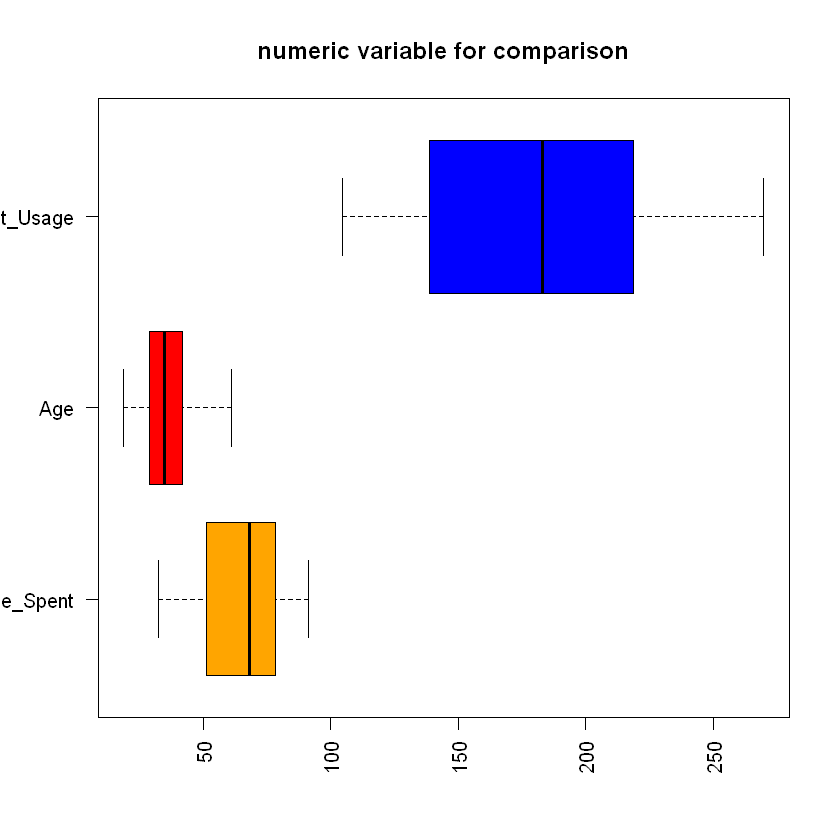

In [94]:
timespent <- df$Daily.Time.Spent.on.Site
age <- df$Age
internetusage <- df$Daily.Internet.Usage # code for subsetting the columns 

boxplot(timespent,age,internetusage,
        main = 'numeric variable for comparison',
        at = c(1,2,3),
        names = c("Time_Spent", "Age","Internet_Usage"),
        horizontal = TRUE,
        col = c("Orange","Red","Blue"),
        las = 2
       )

* boxplots of the age,time spent on site,and daily internet usage showing no occurence of outliers in the columns*

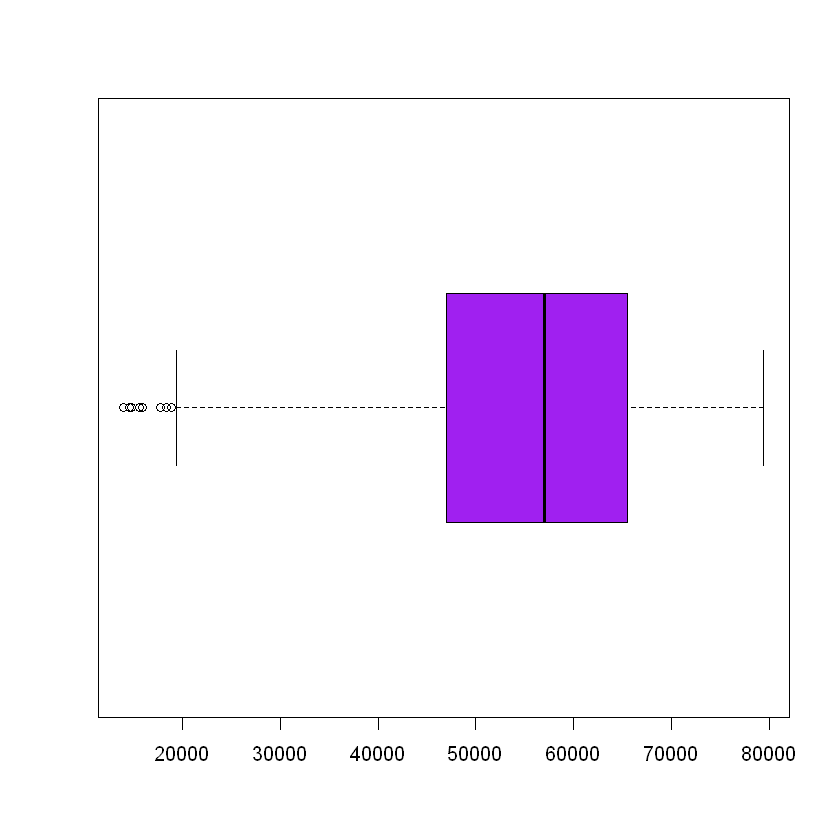

In [95]:
income <- df$Area.Income
boxplot(income,
       col = c("Purple"),
       names = c("income"),
       horizontal = TRUE 
       )

*the income column is displaying occurence of outliers on the lower end of the income spectrum*

In [96]:
boxplot.stats(income)$out # returns the values of the ourliers in the column

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

* above I displayed the oultier values,in this case their are 8 outliers in the income column all of which are below the low end cutoff point of 20,000

* I will now attempt to remove the outliers below

In [97]:
outliers <- boxplot(income,plot=FALSE)$out

x <- df
x <- x[-which(income %in% outliers),]

In [98]:
head(x)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [99]:
x <- data.frame(x)

In [100]:
dim(x)

[1] 992  10

In [101]:
dim(df)

[1] 1000   10

cleanx <- x[!duplicated(x)]
cleanx

In [102]:
sapply(df,class) #method for checking the datatype

Daily.Time.Spent.on.Site                      Age              Area.Income 
               "numeric"                "integer"                "numeric" 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
               "numeric"                 "factor"                 "factor" 
                    Male                  Country                Timestamp 
               "integer"                 "factor"                 "factor" 
           Clicked.on.Ad 
               "integer"

* above we have displayed the datatypes of the columns and noted that majority of the columns are either factor or numerical columns

In [103]:
summary(df)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
                                                                              
                                 Ad.Topic.Line              City    
 Adaptive 24hour Graphic Interface      :  1   Lisamouth      :  3  
 Adaptive asynchronous attitude         :  1   Williamsport   :  3  
 Adaptive context-sensitive application :  1   Benjaminchester:  2  
 Adaptive contextually-based methodology:  1   East John      :  2  
 Adaptive demand-driven

* calculating the measures of central tendency for the dataset

## EXPLORATORY DATA ANALYSIS

## Univariate Analysis

In [104]:
getmode <- function(v) { # takes in an oject v
   uniqv <- unique(v) #gets the unique values from v 
   uniqv[which.max(tabulate(match(v, uniqv)))]}  # this line of code arranges the unique values obtained using ht max function and 
# uses the match method to match the unique value to the original object in v and counts how many times the value appears using the tabulate method

* function above will be used to get the mode of the columns*

In [105]:
ads <- df$Clicked.on.Ad #subsetting the ads column

In [106]:
counts <- table(ads,age)# creating a table of counts for the ads and age column 

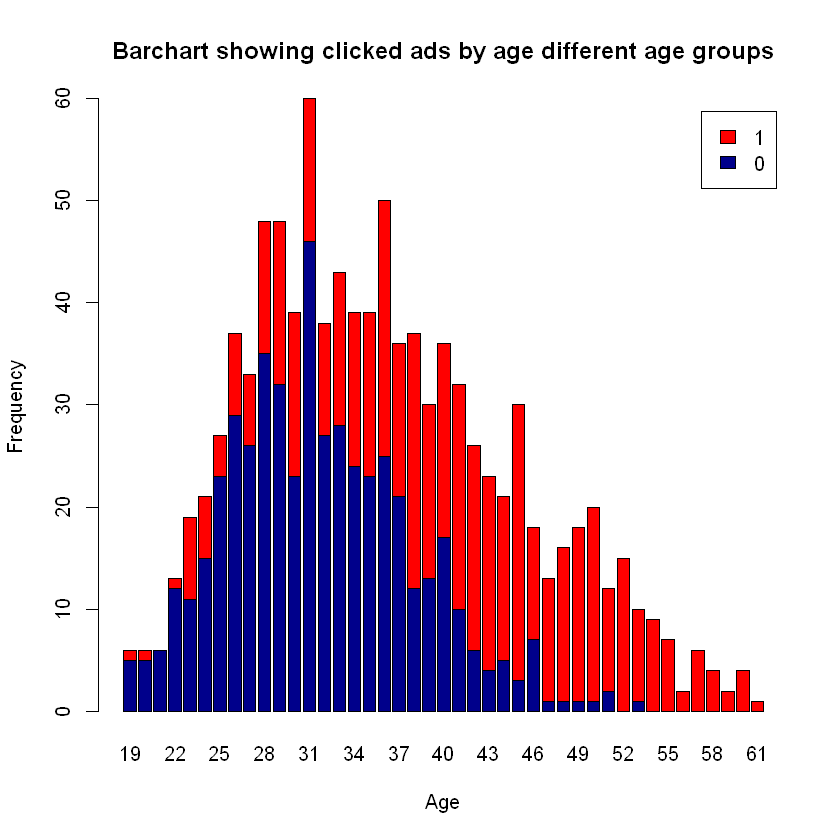

In [107]:
barplot(counts,
       main="Barchart showing clicked ads by age different age groups",
       xlab="Age",
       ylab="Frequency",
       col = c("darkblue","red"),
       legend = rownames(counts) 
       )

#### measures of central tendency for the age column 


In [108]:
print(getmode(age))# getting the mode  of the age column

print(mean(age))# getting the mean of the age column

print(median(age))# getting the of median the age column

print(sd(age))# getting the standard deviation of the age column

[1] 31
[1] 36.009
[1] 35
[1] 8.785562


In [109]:
print(range(age)) # getting the range of the age column

print(quantile(age))# getting the quantile of the age column

print(var(age))# getting the variance of the age column

print(kurtosis(age))# getting the kurtosis 

print(skewness(age))#getting the skewness

[1] 19 61
  0%  25%  50%  75% 100% 
  19   29   35   42   61 
[1] 77.18611
[1] 2.595482
[1] 0.4784227


* above we can see the distribution by age of people who clicked the ads and those who didnt (0 is clicked on ad,1 did not click on the ad)

* we can note the distribution is normal but slighty skewed to the left 

* we can also note that majority of the people who clicked on the ads were below 40 years while most peoplw above 50 did not click on them

* calculating the measures of central tendency it appears that the mean age is 36 years while the median age is slightly below that at 35 years

* it also appears that the most common age is 31 which is also the age that was most likely to click on the ads

* the age column has a standard deviation of 8 years

* the age range is between 19 and 61 years while the variance is 77

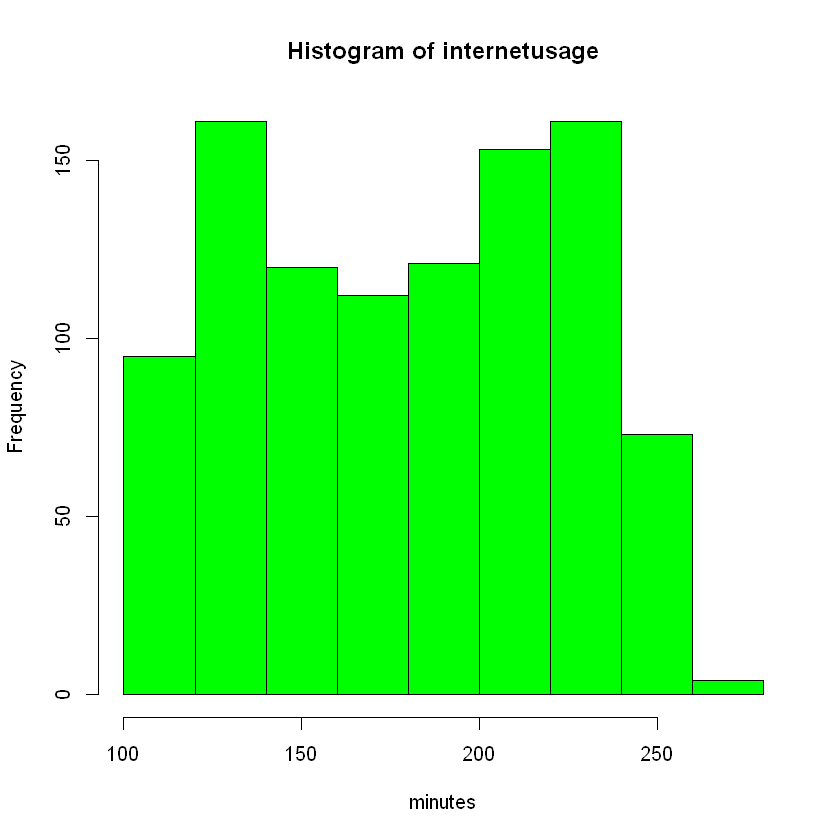

In [110]:
hist(internetusage,
    col = "green",
    xlab = "minutes")#plotting a histogram of the internet usage column with args color and xlabel

* the histogram above indicates a bimodal distribution pertaining to the internet usage of the participants with noticeable peaks in between 100-150 minutes and 200-250 minutes

#### measures of central tendency for the internet usage column

In [111]:
print(getmode(internetusage))# getting the mode  of the internetusage column

print(mean(internetusage))# getting the mean of the internetusage column

print(median(internetusage))# getting the of median the internetusage column

print(sd(internetusage))# getting the standard deviation of the internetusage column

[1] 167.22
[1] 180.0001
[1] 183.13
[1] 43.90234


* the measures of central tendency above indicate most people tend to spend atleast 3  hours using the internet with both the mean and median clocking in at 180 min while the mode is at 167 min which is just under 3 hours
* the standard deviation is 43 minutes

In [112]:
print(range(internetusage)) # getting the range of the internetusage column

print(quantile(internetusage))# getting the quantile of the internetusage column

print(var(internetusage))# getting the variance of the internetusage column

print(kurtosis(internetusage))# getting the kurtosis 

print(skewness(internetusage))#getting the skewness

[1] 104.78 269.96
      0%      25%      50%      75%     100% 
104.7800 138.8300 183.1300 218.7925 269.9600 
[1] 1927.415
[1] 1.727701
[1] -0.03348703


* the lowest using user spent 104 minutes or just over an hour and 40 minutes whilst the user who used the internet the most spent 269 minutes or just over 4 hours

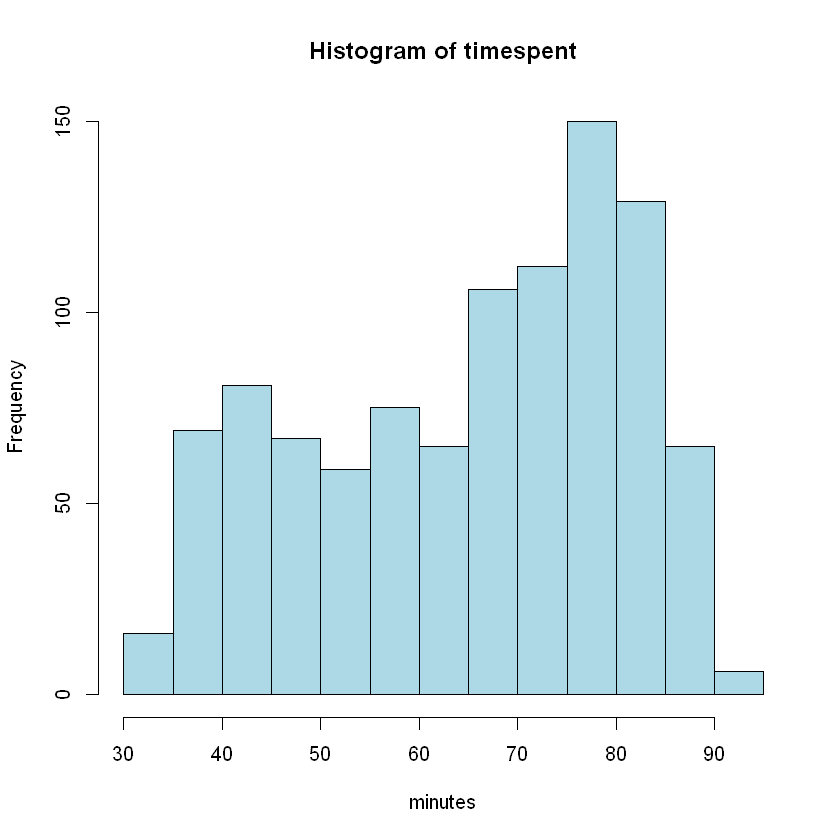

In [113]:
hist(timespent,
    col= "lightblue",
    xlab= "minutes")

* the histogram of time spent on the site appears to be skewed to the right indicating most people spend atleast more than an hour on the site

* majority of the people spend between 70 and 85 minutes on the site

#### measures of central tendency for the timespent on site

In [114]:
print(getmode(timespent))# getting the mode  of the timespent column

print(mean(timespent))# getting the mean of the timespent column

print(median(timespent))# getting the of median the timespent column

print(sd(timespent))# getting the standard deviation of the timespent column

[1] 62.26
[1] 65.0002
[1] 68.215
[1] 15.85361


* the measures of central tendency indicate most people spent atleast an hour on the site  with the mean,mode and median ranging from 62 for the mode to 68 for the median with a standard deviation of 15 minutes

In [115]:
print(range(timespent)) # getting the range of the timespent column

print(quantile(timespent))# getting the quantile of the timespent column

print(var(timespent))# getting the variance of the timespent column

print(kurtosis(timespent))# getting the kurtosis 

print(skewness(timespent))#getting the skewness

[1] 32.60 91.43
     0%     25%     50%     75%    100% 
32.6000 51.3600 68.2150 78.5475 91.4300 
[1] 251.3371
[1] 1.903942
[1] -0.3712026


* the user who spent the least time on the site spent just over 30 min whilst the user who spent the most time spent over 1 and a half hours on the site
* the variance is 251

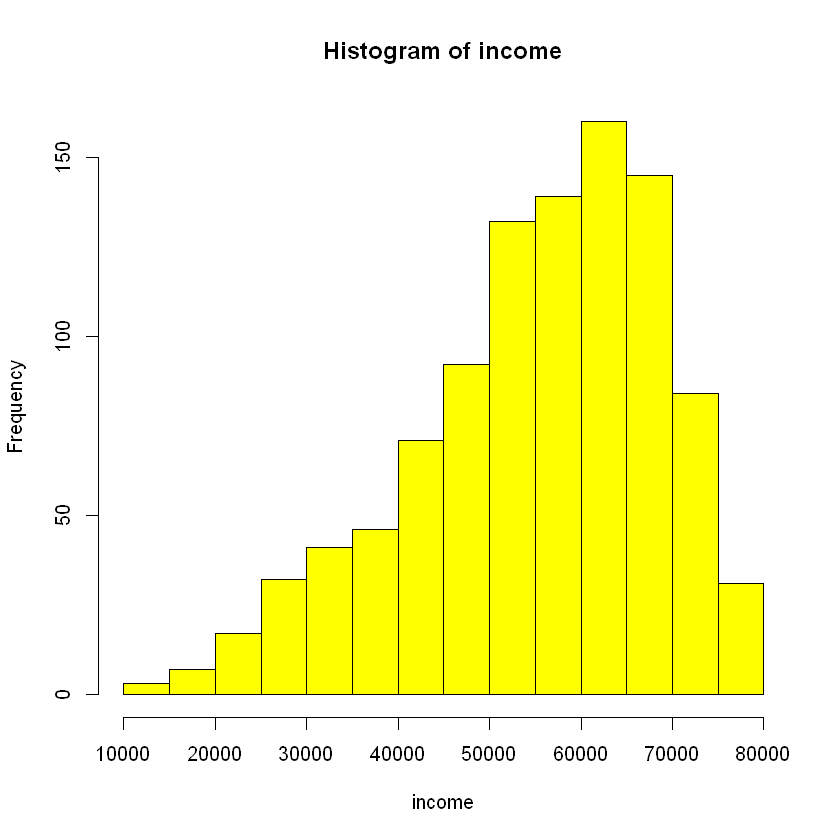

In [116]:
hist(income,
    col= "yellow")

In [117]:
print(getmode(income))# getting the mode  of the income column

print(mean(income))# getting the mean of the income column

print(median(income))# getting the of median the income column

print(sd(income))# getting the standard deviation of the income column

[1] 61833.9
[1] 55000
[1] 57012.3
[1] 13414.63


* this is indicated above by noticing the mean and median income above the 50000 range whilst the most common income is 61000
* the income of the individuals is extremely skewed to the right indicating majority of the users are high income earners

In [118]:
print(range(income)) # getting the range of the income column

print(quantile(income))# getting the quantile of the income column

print(var(income))# getting the variance of the income column

print(kurtosis(income))# getting the kurtosis 

print(skewness(income))#getting the skewness

[1] 13996.5 79484.8
      0%      25%      50%      75%     100% 
13996.50 47031.80 57012.30 65470.64 79484.80 
[1] 179952406
[1] 2.894694
[1] -0.6493967


* the range of the incomes indicate the lowest income being just under 14,000 while the highest income being just under 80,000 or a range of about 66,000 units
* I still don't understand how the variance is that large number,will get back to it 

In [119]:
country <- df$Country 

counts2 <- table(country) #creating a table counting the number of occurences of a country
counts2

country
                                        Afghanistan 
                                                  8 
                                            Albania 
                                                  7 
                                            Algeria 
                                                  6 
                                     American Samoa 
                                                  5 
                                            Andorra 
                                                  2 
                                             Angola 
                                                  4 
                                           Anguilla 
                                                  6 
       Antarctica (the territory South of 60 deg S) 
                                                  3 
                                Antigua and Barbuda 
                                                  5 
                                      

### Bivariate Analysis

In [120]:
print(cov(income,timespent))

print(cov(timespent,internetusage))

print(cov(income,internetusage))

[1] 66130.81
[1] 360.9919
[1] 198762.5


* 

In [121]:
cor(income,timespent)

[1] 0.3109544

In [122]:
cor(timespent,internetusage)

[1] 0.5186585

* the timespent on site and internetusage columns seem to have some medium degree of correlation with each other

In [123]:
cor(income,internetusage)

[1] 0.3374955

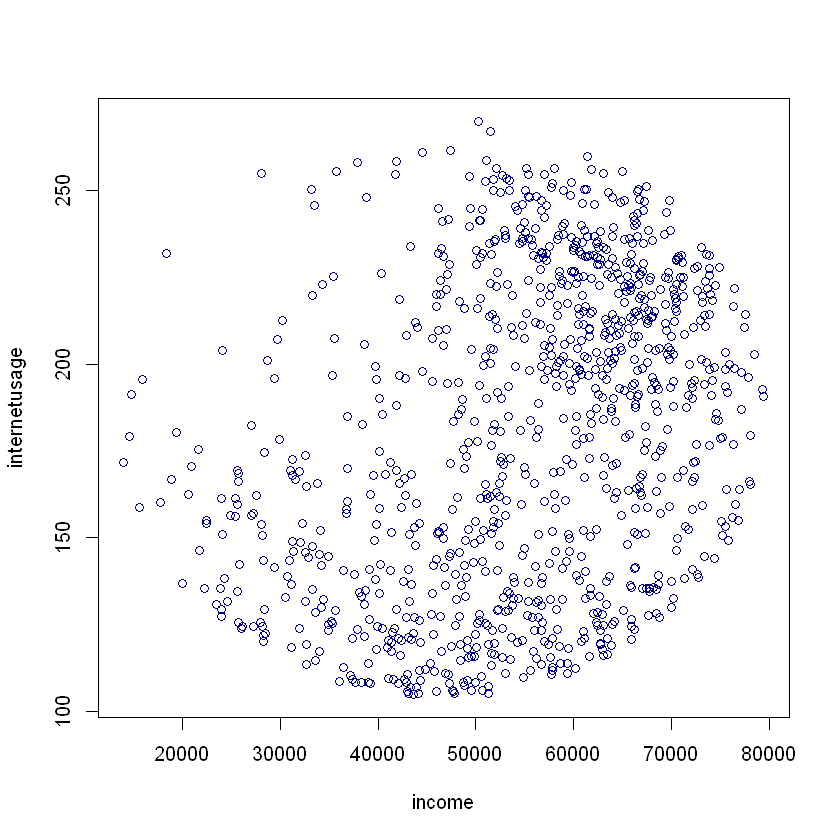

In [124]:
plot(income,internetusage,col="darkblue")

* above it appears that the higher the income an individual has the more minutes in a day they use the internet
* it also appears that individuals with an income of between 40,000 and 60,000 are the ones who use the internet the least
* this could mean that the higher earning individuals are professionals or managers who might have more free time to allocate to using the internet as oppossed to the lesser earnign individuals

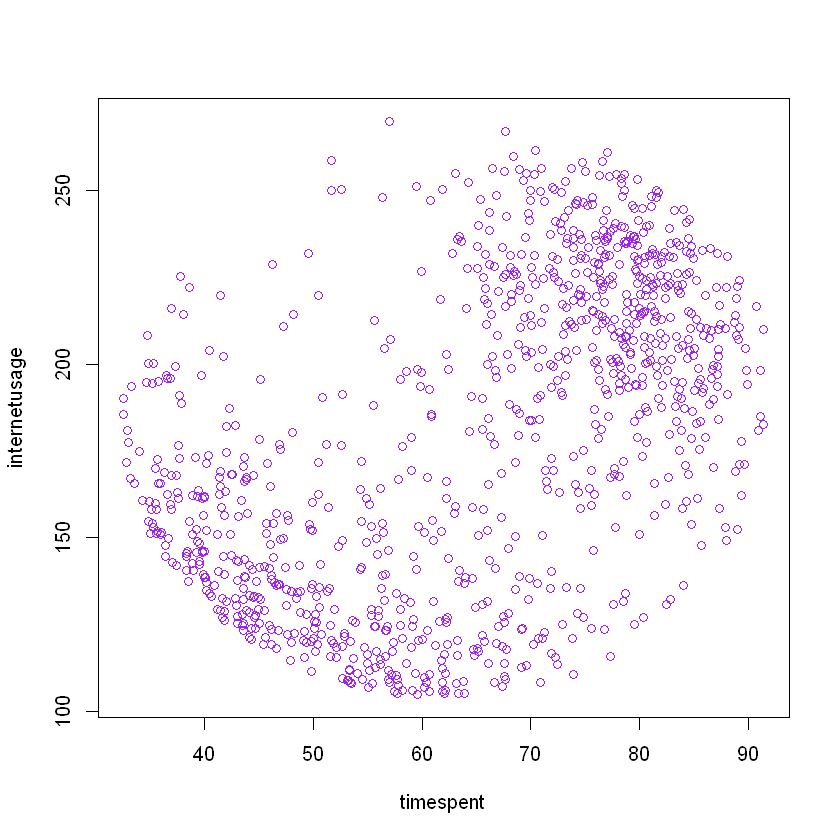

In [125]:
plot(timespent,internetusage,col= "purple")

* above their appears to be a clear correlation showing the less amount of time somebody used the internet the less time they spent on the platform and vice versa

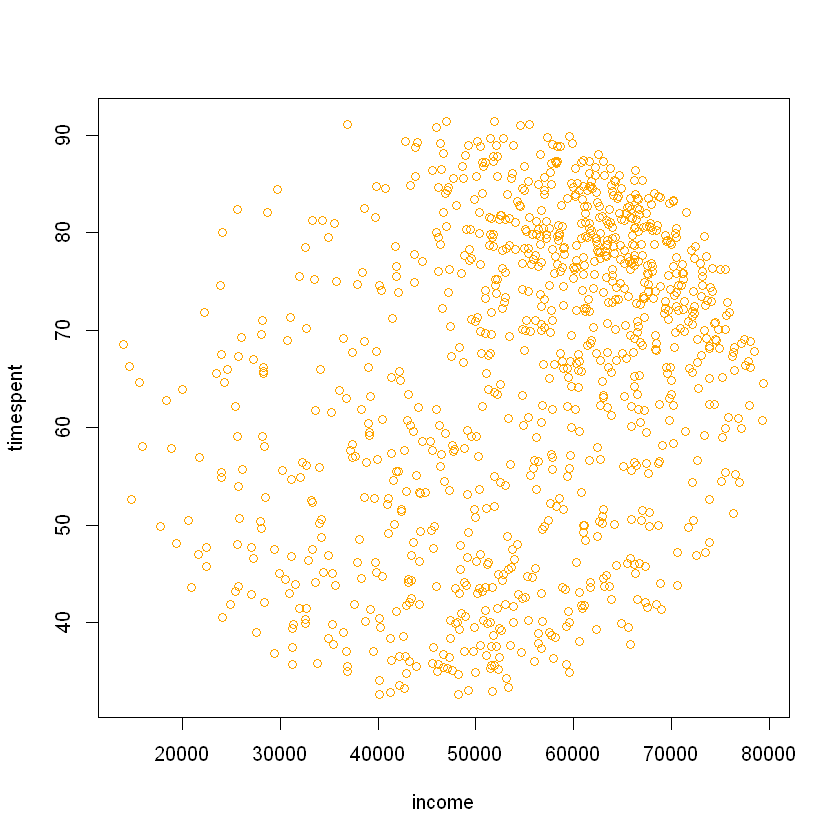

In [126]:
plot(income,timespent,col="orange")

* the scatterplot above indicates the previous data we have observed above about higher income individuals spending more time on the platform

In [127]:
df1 <- df %>%
        select("Daily.Time.Spent.on.Site","Age","Area.Income","Daily.Internet.Usage")# subsetting the dataset and selecting only the numeric columns for analysis

In [128]:
spearman <- cor(df1,method = c("spearman")) #calculating the spearman coefficient of the numeric variables
spearman

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage
Daily.Time.Spent.on.Site,1.0000000,-0.3168616,0.2831344,0.5141081
Age,-0.3168616,1.0000000,-0.1359540,-0.3708639
Area.Income,0.2831344,-0.1359540,1.0000000,0.3391602
Daily.Internet.Usage,0.5141081,-0.3708639,0.3391602,1.0000000


* the coefficients indicate somewhat high degrees of correlation between the internet usage and timespent on site 
* no other variables seem to have high degrees of correlation

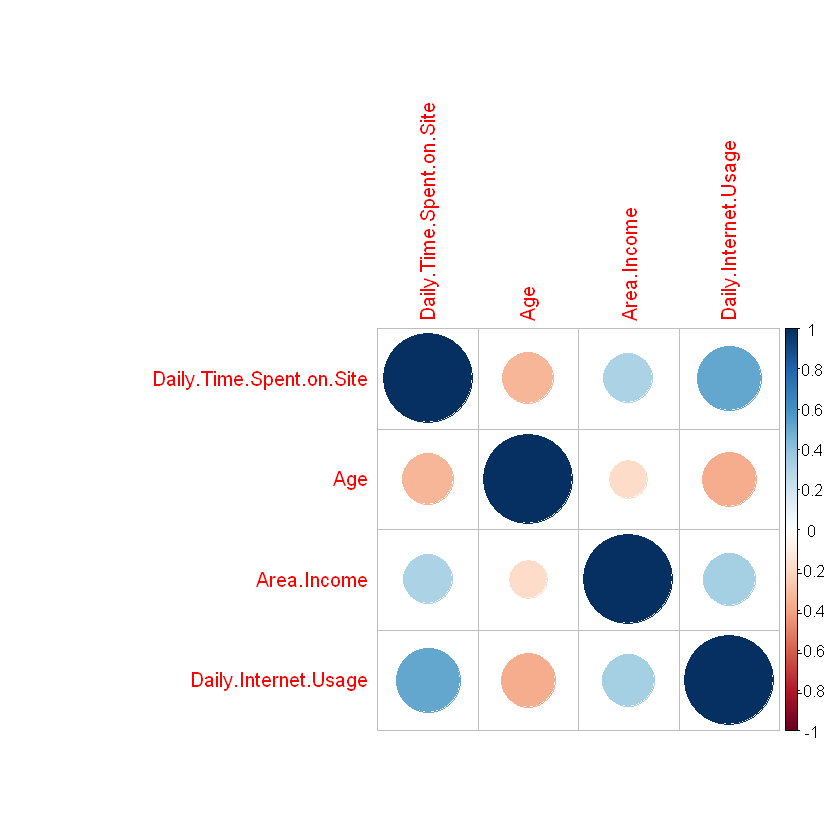

In [129]:
corrplot(cor(df1))

* scatterplot of the numerical columns(r has some weird scatterplots)

## Principal Component Analysis

In [130]:
pca <- princomp(df1,scores=TRUE,cor=TRUE)
summary(pca)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4
Standard deviation     1.4301799 0.9047446 0.8114198 0.6911009
Proportion of Variance 0.5113536 0.2046407 0.1646005 0.1194051
Cumulative Proportion  0.5113536 0.7159944 0.8805949 1.0000000

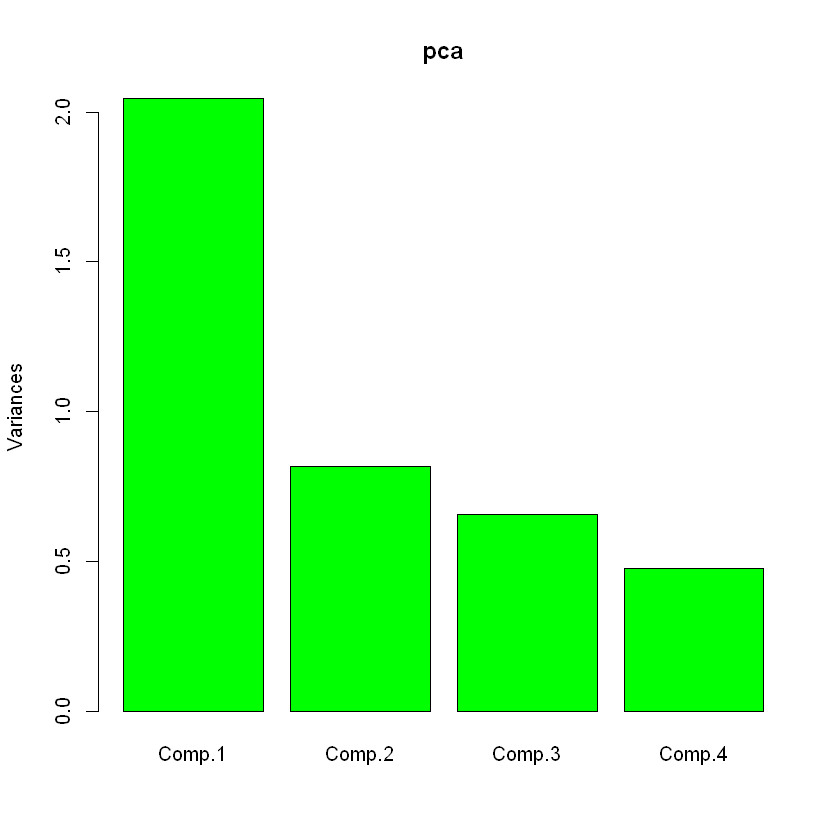

In [131]:
plot(pca,col="green")

* pca analysis of the numerical columns
* it appears that the first component contributes of 51% to the overall variance which is enormous,infact the first 3 components explain 88% of the total variance 

## Modelling

In [132]:
head(df)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


## Decision Tree Classifier

In [133]:
df$Clicked.on.Ad <- factor(df$Clicked.on.Ad, levels = c(0,1))

sapply(df, class)

Daily.Time.Spent.on.Site                      Age              Area.Income 
               "numeric"                "integer"                "numeric" 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
               "numeric"                 "factor"                 "factor" 
                    Male                  Country                Timestamp 
               "integer"                 "factor"                 "factor" 
           Clicked.on.Ad 
                "factor"

In [134]:
tree <- rpart(Clicked.on.Ad ~ . , 
    data = df, 
    method = "class")

# model <- train(Clicked.on.Ad~.,
#               data = df,
#               method = "ranger")

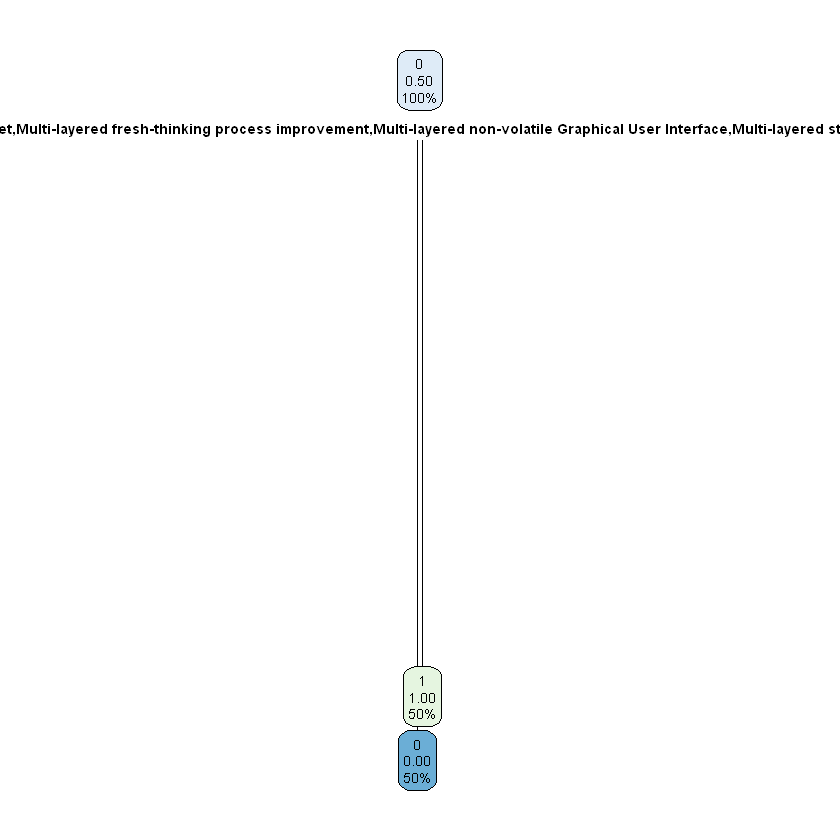

In [135]:
rpart.plot(tree)

In [136]:
pred <- predict(tree, df, type ="class")
table(pred, df$Clicked.on.Ad)

    
pred   0   1
   0 500   0
   1   0 500

In [138]:
mean(df$Clicked.on.Ad == pred)

[1] 1

In [140]:
set.seed(12)

model <- train(Clicked.on.Ad ~ .,
              data = df,
              method = "ranger")

2 packages are needed for this model and are not installed. (e1071, ranger). Would you like to try to install them now?

ERROR: Error: Required package is missing
